# Mount google drive to colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import libraries

In [ ]:
import os
import random 
import numpy as np
import shutil
import time 
from PIL import Image, ImageOps
import cv2
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf

from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.utils import np_utils


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import ImageDataGenerator

from keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
from keras import losses

# Initialize basic working directories

In [ ]:
directory = "drive/MyDrive/Datasets/Sign digits/Dataset"
trainDir = "train"
testDir = "test"
os.chdir(directory)

# Augmented dataframes

In [ ]:
augDir = "augmented/"
classNames_train = os.listdir(augDir+'train/')
classNames_test = os.listdir(augDir+'test/')


classes_train = []
data_train = []
paths_train = []

classes_test = []
data_test = []
paths_test = []

classes_val = []
data_val = []
paths_val = []

for className in range(0,10):
  temp_train = os.listdir(augDir+'train/'+str(className))
  temp_test = os.listdir(augDir+'test/'+str(className))

  for dataFile in temp_train:
    path_train = augDir+'train/'+str(className)+'/'+dataFile

    paths_train.append(path_train)
    classes_train .append(str(className))
 
  testSize = [i for i in range(math.floor(len(temp_test)/2),len(temp_test))]
  valSize = [i for i in range(0,math.floor(len(temp_test)/2))]
  for dataFile in testSize:
    path_test = augDir+'test/'+str(className)+'/'+temp_test[dataFile]

    paths_test.append(path_test)
    classes_test .append(str(className))

  for dataFile in valSize:
    path_val = augDir+'test/'+str(className)+'/'+temp_test[dataFile]

    paths_val.append(path_val)
    classes_val .append(str(className))

 
augTrain_df = pd.DataFrame({'fileNames': paths_train, 'labels': classes_train})
augTest_df = pd.DataFrame({'fileNames': paths_test, 'labels': classes_test})
augVal_df = pd.DataFrame({'fileNames': paths_val, 'labels': classes_val})

In [ ]:
augTrain_df.head(10)

,fileNames,labels
0,augmented/train/0/IMG_5705.JPG,0
1,augmented/train/0/IMG_4306 (1).JPG,0
2,augmented/train/0/IMG_4435.JPG,0
3,augmented/train/0/IMG_4306.JPG,0
4,augmented/train/0/IMG_4435 (1).JPG,0
5,augmented/train/0/IMG_5276.JPG,0
6,augmented/train/0/IMG_4543 (1).JPG,0
7,augmented/train/0/IMG_5276 (1).JPG,0
8,augmented/train/0/IMG_4543.JPG,0
9,augmented/train/0/IMG_5705 (1).JPG,0


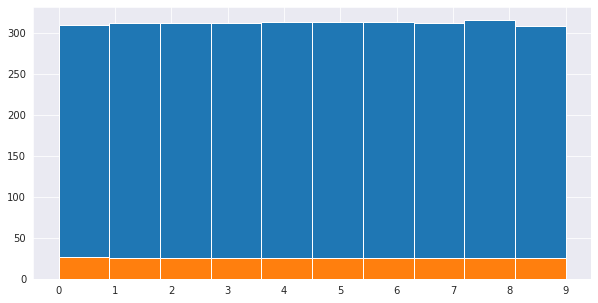

In [ ]:
augTrain_df['labels'].hist(figsize=(10,5))
augTest_df['labels'].hist(figsize=(10,5))

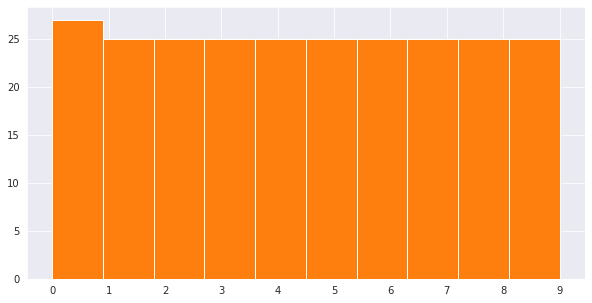

In [ ]:
augTest_df['labels'].hist(figsize=(10,5))
augVal_df['labels'].hist(figsize=(10,5))

In [ ]:
augTrainX=[]
augTrainY=[]
augTestX=[]
augTestY=[]
augValX=[]
augValY=[]

iter = -1

#read images from train set
for path in augTrain_df['fileNames']:
    iter = iter + 1
    #image = np.array((Image.open(path)))
    image = cv2.imread(path)
    augTrainX.append(image)
    label = augTrain_df['labels'][iter]
    augTrainY.append(label)

iter = -1

for path in augTest_df['fileNames']:
    iter = iter + 1
    #image = np.array((Image.open(path)))
    image = cv2.imread(path)
    augTestX.append(image)
    augTestY.append(augTest_df['labels'][iter])

iter = -1

for path in augVal_df['fileNames']:
    iter = iter + 1
    #image = np.array((Image.open(path)))
    image = cv2.imread(path)
    augValX.append(image)
    augValY.append(augVal_df['labels'][iter])

augTrainX = np.array(augTrainX)
augTestX = np.array(augTestX)
augValX = np.array(augValX)

    
augTrainX = augTrainX / 255
augTestX = augTestX / 255
augValX = augValX / 255
# OneHot Encode the Output
augTrainY = np_utils.to_categorical(augTrainY, 10)
augTestY = np_utils.to_categorical(augTestY, 10)
augValY = np_utils.to_categorical(augValY, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=augTrain_df,
                                                    x_col="fileNames",
                                                    y_col="labels",
                                                    batch_size=16,
                                                    class_mode="categorical",
                                                    color_mode="grayscale",
                                                    target_size=(100,100),
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_dataframe(dataframe=augVal_df,
                                                    x_col="fileNames",
                                                    y_col="labels",
                                                    batch_size=16,
                                                    class_mode="categorical",
                                                    color_mode="grayscale",
                                                    target_size=(100,100),
                                                    shuffle=True)

test_generator = test_datagen.flow_from_dataframe(dataframe=augTest_df,
                                                    x_col="fileNames",
                                                    y_col="labels",
                                                    batch_size=16,
                                                    class_mode="categorical",
                                                    color_mode="grayscale",
                                                    target_size=(100,100),
                                                    shuffle=True)

Found 3124 validated image filenames belonging to 10 classes.
Found 252 validated image filenames belonging to 10 classes.
Found 252 validated image filenames belonging to 10 classes.


In [ ]:
model_best = models.Sequential()

model_best.add(layers.Conv2D(64, (3,3), input_shape=(100, 100,1), padding='same', activation='relu'))
model_best.add(layers.BatchNormalization(momentum=0.1))
model_best.add(layers.MaxPooling2D(pool_size=(2,2)))
model_best.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model_best.add(layers.BatchNormalization(momentum=0.1))
model_best.add(layers.MaxPooling2D(pool_size=(2,2)))
model_best.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model_best.add(layers.BatchNormalization(momentum=0.1))
model_best.add(layers.MaxPooling2D(pool_size=(2,2)))
model_best.add(layers.Flatten())
model_best.add(layers.Dense(128, activation='relu'))
model_best.add(layers.Dropout(0.2))
model_best.add(layers.Dense(10, activation='softmax'))

model_best.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 16)        4

In [ ]:
print("[INFO] Model is training...")
time1 = time.time()   # to measure time taken
# Compile the model
model_best.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

history_best = model_best.fit(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("[INFO] Model is trained.")

[INFO] Model is training...
Epoch 1/20
195/195 [==============================] - 87s 443ms/step - loss: 1.5492 - acc: 0.5419 - val_loss: 0.4457 - val_acc: 0.8373
Epoch 2/20
195/195 [==============================] - 86s 439ms/step - loss: 0.3078 - acc: 0.8933 - val_loss: 0.2915 - val_acc: 0.9087
Epoch 3/20
195/195 [==============================] - 85s 436ms/step - loss: 0.1132 - acc: 0.9614 - val_loss: 0.3068 - val_acc: 0.8968
Epoch 4/20
195/195 [==============================] - 86s 440ms/step - loss: 0.0780 - acc: 0.9808 - val_loss: 0.2856 - val_acc: 0.9246
Epoch 5/20
195/195 [==============================] - 86s 438ms/step - loss: 0.0408 - acc: 0.9869 - val_loss: 0.2254 - val_acc: 0.9444
Epoch 6/20
195/195 [==============================] - 86s 439ms/step - loss: 0.0308 - acc: 0.9909 - val_loss: 0.3072 - val_acc: 0.9286
Epoch 7/20
195/195 [==============================] - 85s 437ms/step - loss: 0.0409 - acc: 0.9857 - val_loss: 0.2902 - val_acc: 0.9246
Epoch 8/20
195/195 [=======

In [ ]:
score = model_best.evaluate(test_generator)

print('===Testing loss and accuracy===')
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

16/16 [==============================] - 2s 111ms/step - loss: 0.4789 - acc: 0.9405
===Testing loss and accuracy===
Test loss:  0.47893190383911133
Test accuracy:  0.9404761791229248


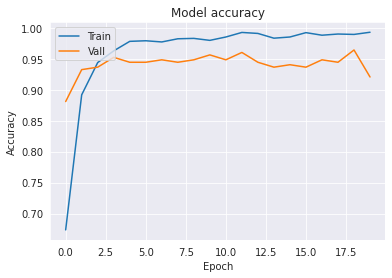

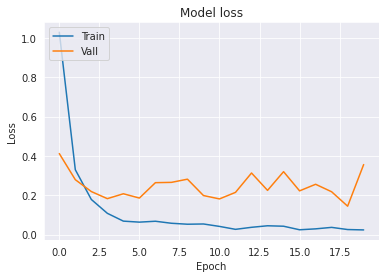

In [ ]:
import matplotlib.pyplot as plot
plot.plot(history_best.history['acc'])
plot.plot(history_best.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()

plot.plot(history_best.history['loss'])
plot.plot(history_best.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Vall'], loc='upper left')
plot.show()